In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('titanic')
    
titanic_data = pd.read_csv('train.csv')
titanic_data1 = pd.read_csv('test.csv')
titanic_data2 = pd.read_csv('gender_submission.csv')

In [8]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_data = titanic_data.dropna()
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000


In [9]:
titanic_data1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
titanic_data2.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [12]:
women = titanic_data.loc[titanic_data['Sex'] == 'female']['Survived']
print("Women: ", sum(women)/len(women)*100)
men = titanic_data.loc[titanic_data['Sex'] == 'male']['Survived']
print("Men: ", sum(men)/len(men)*100)

Women:  75.47892720306514
Men:  20.52980132450331


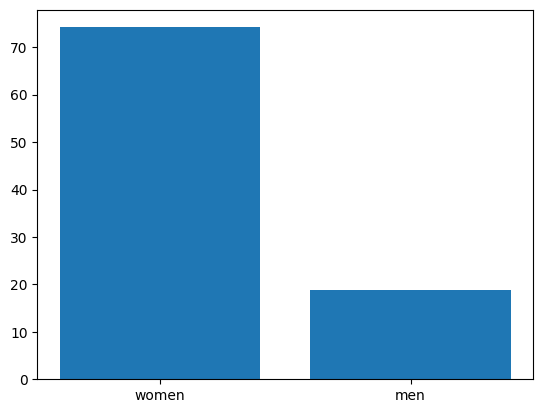

In [13]:
import matplotlib.pyplot as plt


x = np.array(["women","men"])
y = np.array([74.20382165605095,18.890814558058924])

plt.bar(x,y)
plt.show()

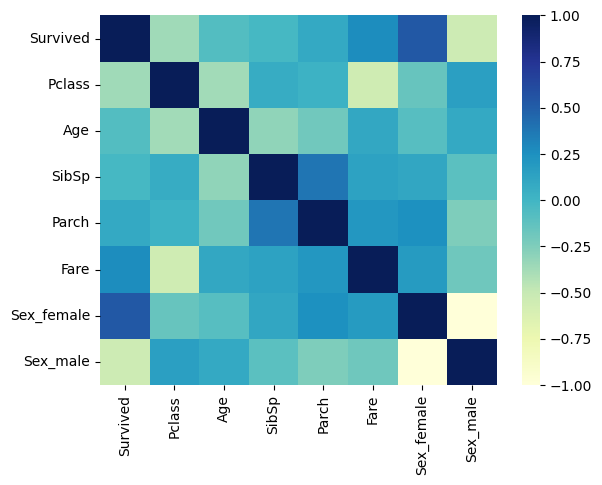

In [16]:
sns.heatmap(titanic_data.corr(),cmap="YlGnBu",annot=False, fmt='.2f')
plt.show()

In [15]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'])
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree classifier: {:.2f}%".format(accuracy*100))

Accuracy of the decision tree classifier: 74.42%


In [18]:
print(X_train)

     Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male
37        3  21.0      0      0    8.0500       False      True
58        2   5.0      1      2   27.7500        True     False
57        3  28.5      0      0    7.2292       False      True
94        3  59.0      0      0    7.2500       False      True
209       1  40.0      0      0   31.0000       False      True
..      ...   ...    ...    ...       ...         ...       ...
92        1  46.0      1      0   61.1750       False      True
134       2  25.0      0      0   13.0000       False      True
337       1  41.0      0      0  134.5000        True     False
548       3  33.0      1      1   20.5250       False      True
130       3  33.0      0      0    7.8958       False      True

[499 rows x 7 columns]


In [19]:
print(y_train)

37     0
58     1
57     0
94     0
209    1
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 499, dtype: int64
